## Model Training

#### 1.1 Import Data and Required Packages
##### Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [1]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

import warnings

#### Import the CSV Data as Pandas DataFrame

In [2]:
df = pd.read_csv('data/StudentsPerformance.csv')

#### Show Top 5 Records

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


#### Preparing X and Y variables

In [4]:
X = df.drop(columns=['math score'],axis=1)

In [5]:
X[:5]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [6]:
categorical_features = X.select_dtypes(include=['object']).columns
numerical_features = X.select_dtypes(exclude=['object']).columns

for f in categorical_features:
    print(f + ",", X[f].unique())

gender, ['female' 'male']
race/ethnicity, ['group B' 'group C' 'group A' 'group D' 'group E']
parental level of education, ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
lunch, ['standard' 'free/reduced']
test preparation course, ['none' 'completed']


In [7]:
y = df['math score']

In [8]:
y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math score, Length: 1000, dtype: int64

In [9]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

preprocessing = ColumnTransformer(
    [
        ('onehot', OneHotEncoder(drop='first'), categorical_features),
        ('scaler', StandardScaler(), numerical_features)
    ],
    remainder='passthrough'  # Keep any other columns unchanged
)

X = preprocessing.fit_transform(X)

In [10]:
X[:5]

array([[ 0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  1.        ,  0.19399858,  0.39149181],
       [ 0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         1.        ,  0.        ,  1.42747598,  1.31326868],
       [ 0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         1.        ,  1.        ,  1.77010859,  1.64247471],
       [ 1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  1.        , -0.83389925, -1.58374436],
       [ 1.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         1.        ,  1.  

In [11]:
X.shape

(1000, 14)

In [12]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((800, 14), (200, 14))

#### Create an Evaluate Function to give all metrics after model Training

In [13]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

In [14]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [30]:
def train_models(models):
    model_list = []
    scores = {}
    y_pred = {}

    for name, model in models:
        model.fit(X_train, y_train) # Train model

        # Make predictions
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
        y_pred[name] = y_test_pred
        
        # Evaluate Train and Test dataset
        model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

        model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

        
        print(name)
        model_list.append(name)
        
        print('Model performance for Training set')
        print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
        print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
        print("- R2 Score: {:.4f}".format(model_train_r2))

        print('----------------------------------')
        
        print('Model performance for Test set')
        print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
        print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
        print("- R2 Score: {:.4f}".format(model_test_r2))
        scores[name] = (model_test_mae , model_test_rmse, model_test_r2)
        
        print('='*35)
        print('\n')
        
    return model_list, scores, y_pred

In [31]:
models = [
    ("Linear Regression", LinearRegression()),
    ("Lasso", Lasso()),
    ("Ridge", Ridge()),
    ("SVR", SVR()),
    ("K-Neighbors Regressor", KNeighborsRegressor()),
    ("Decision Tree", DecisionTreeRegressor()),
    ("Random Forest Regressor", RandomForestRegressor()),
    ("XGBRegressor", XGBRegressor()), 
    ("CatBoosting Regressor", CatBoostRegressor(verbose=False)),
    ("AdaBoost Regressor", AdaBoostRegressor())
]

model_list, scores, y_pred = train_models(models)

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 5.3231
- Mean Absolute Error: 4.2667
- R2 Score: 0.8743
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.3940
- Mean Absolute Error: 4.2148
- R2 Score: 0.8804


Lasso
Model performance for Training set
- Root Mean Squared Error: 6.5938
- Mean Absolute Error: 5.2063
- R2 Score: 0.8071
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.5197
- Mean Absolute Error: 5.1579
- R2 Score: 0.8253


Ridge
Model performance for Training set
- Root Mean Squared Error: 5.3235
- Mean Absolute Error: 4.2650
- R2 Score: 0.8743
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.3936
- Mean Absolute Error: 4.2125
- R2 Score: 0.8805


SVR
Model performance for Training set
- Root Mean Squared Error: 6.7454
- Mean Absolute Error: 4.9831
- R2 Score: 0.7982
----------------------------------
Model 

### Results

In [33]:
model_scores = pd.DataFrame(scores.values(), columns=['Mean_Absolute_Error', 'Root_Mean_Square_Error', 'R2_Score'])
model_scores.insert(0, 'Model Name', model_list)
model_scores.sort_values(by="R2_Score", ascending=False) # R2_Score for overall model performance

,Model Name,Mean_Absolute_Error,Root_Mean_Square_Error,R2_Score
2,Ridge,4.212515,5.393586,0.880451
0,Linear Regression,4.214763,5.393994,0.880433
6,Random Forest Regressor,4.663683,5.981091,0.852989
8,CatBoosting Regressor,4.633506,6.045589,0.849801
9,AdaBoost Regressor,4.716629,6.075126,0.848330
1,Lasso,5.157882,6.519695,0.825320
7,XGBRegressor,5.078543,6.524809,0.825046
4,K-Neighbors Regressor,5.747000,7.407496,0.774507
5,Decision Tree,6.630000,8.278285,0.718376
3,SVR,5.504566,8.356715,0.713014


### Try Hyperparameter to improve model performance

In [34]:
params = [
    {
        'alpha': [0.1, 1.0, 10.0, 100.0]
    },
    {
        'fit_intercept': [True, False],
    },
    {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }
]

top_model = [
    ("Ridge", Ridge(), params[0]),
    ("Linear Regression", LinearRegression(), params[1]), 
    ("Random Forest Regressor", RandomForestRegressor(), params[2])
]

best_params = {}

for name, model, param in top_model:
    clf = RandomizedSearchCV(estimator=model, param_distributions=param, n_iter=10, cv=5, verbose=2, n_jobs=-1)
    clf.fit(X_train, y_train)
    params = clf.best_params_
    best_params[name] = clf.best_params_

best_params

Fitting 5 folds for each of 4 candidates, totalling 20 fits


/Users/mjlk/Documents/GitHub/ML-Project/venv/lib/python3.11/site-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=1.0; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=1.0; total time=   0.0s
[CV] END ..........................................alpha=1.0; total time=   0.0s
[CV] END ..........................................alpha=1.0; total time=   0.0s
[CV] END .........................................alpha=10.0; total time=   0.0s
[CV] END .........................................alpha=10.0; total time=   0.0s
[CV] END .........................................alpha=10.0; total time=   0.0s
[CV] END .........................................alpha=10.0; total time=   0.0s
[CV] END ...................

/Users/mjlk/Documents/GitHub/ML-Project/venv/lib/python3.11/site-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.4s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.4s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.4s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total tim

{'Ridge': {'alpha': 1.0},
 'Linear Regression': {'fit_intercept': True},
 'Random Forest Regressor': {'n_estimators': 50,
  'min_samples_split': 2,
  'min_samples_leaf': 4,
  'max_depth': 30}}

In [35]:
models = [
    ("Ridge", Ridge(**best_params["Ridge"])),
    ("Linear Regression", LinearRegression(**best_params["Linear Regression"])), 
    ("Random Forest Regressor", RandomForestRegressor(**best_params["Random Forest Regressor"]))
]

model_list, scores_update, y_pred = train_models(models)

Ridge
Model performance for Training set
- Root Mean Squared Error: 5.3235
- Mean Absolute Error: 4.2650
- R2 Score: 0.8743
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.3936
- Mean Absolute Error: 4.2125
- R2 Score: 0.8805


Linear Regression
Model performance for Training set
- Root Mean Squared Error: 5.3231
- Mean Absolute Error: 4.2667
- R2 Score: 0.8743
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.3940
- Mean Absolute Error: 4.2148
- R2 Score: 0.8804


Random Forest Regressor
Model performance for Training set
- Root Mean Squared Error: 4.3606
- Mean Absolute Error: 3.5188
- R2 Score: 0.9157
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.9660
- Mean Absolute Error: 4.5707
- R2 Score: 0.8537




In [56]:
# compare perforamance of models before and after hyperparameter tuning 
for name, model in models:
    print(f"Model: {name}")
    print(f"Before Tuning: MAE: {scores[name][0]:.4f}, RMSE: {scores[name][1]:.4f}, R2: {scores[name][2]:.4f}")
    print(f"After  Tuning: MAE: {scores_update[name][0]:.4f}, RMSE: {scores_update[name][1]:.4f}, R2: {scores_update[name][2]:.4f}")
    print("="*60)

Model: Ridge
Before Tuning: MAE: 4.2125, RMSE: 5.3936, R2: 0.8805
After  Tuning: MAE: 4.2125, RMSE: 5.3936, R2: 0.8805
Model: Linear Regression
Before Tuning: MAE: 4.2148, RMSE: 5.3940, R2: 0.8804
After  Tuning: MAE: 4.2148, RMSE: 5.3940, R2: 0.8804
Model: Random Forest Regressor
Before Tuning: MAE: 4.6637, RMSE: 5.9811, R2: 0.8530
After  Tuning: MAE: 4.5707, RMSE: 5.9660, R2: 0.8537


#### It turns out, with model tuning, performance remain the same, might need larger dataset

## Plot y_pred and y_test

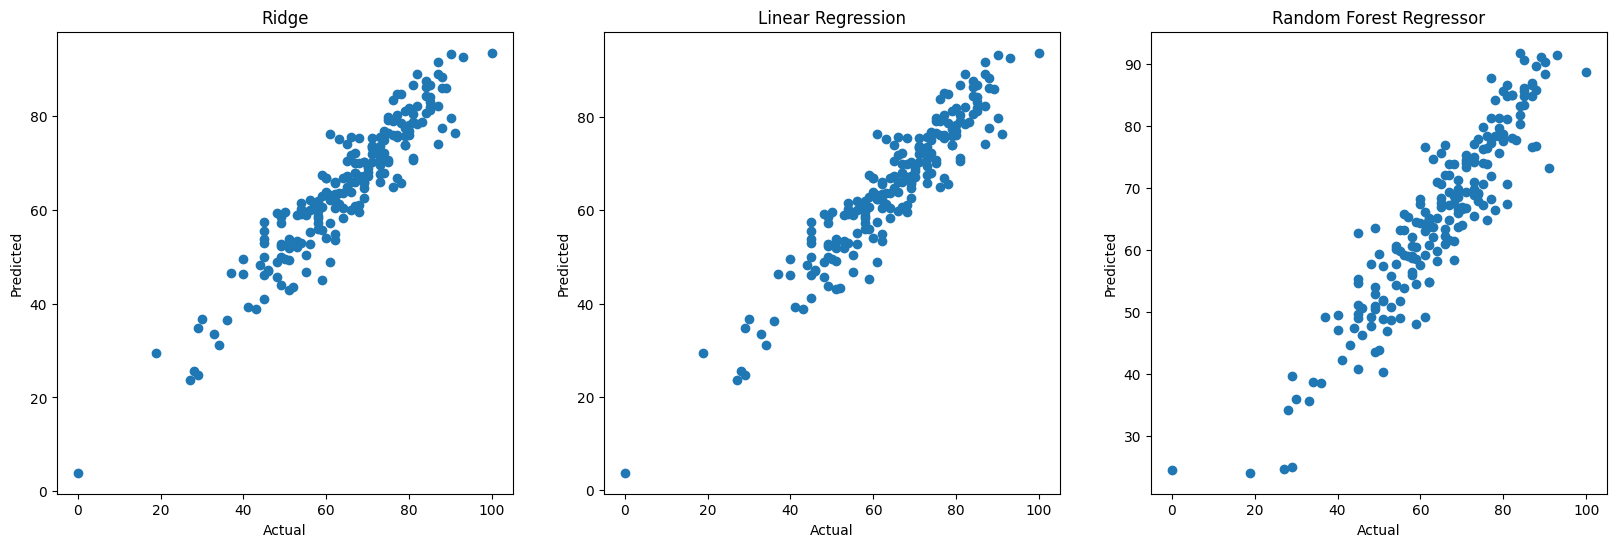

In [57]:
num_models = len(model_list)
plt.figure(figsize=(20, 6))

for i in range(num_models):
    plt.subplot(1, 3, i + 1)
    plt.scatter(y_test,y_pred[model_list[i]])
    plt.title(model_list[i])
    plt.xlabel('Actual')
    plt.ylabel('Predicted')

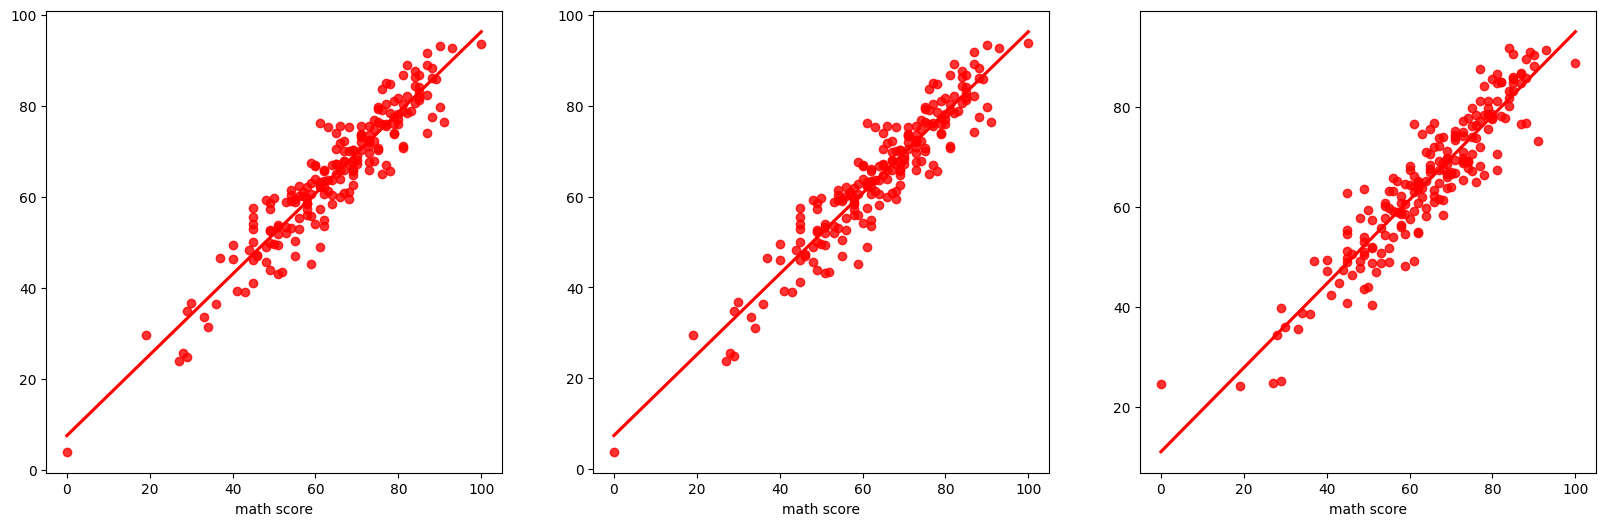

In [58]:
plt.figure(figsize=(20, 6))

for i in range(num_models):
    plt.subplot(1, 3, i + 1)
    sns.regplot(x=y_test,y=y_pred[model_list[i]],ci=None,color ='red')

#### Difference between Actual and Predicted Values

In [59]:
for i in range(num_models):
    print(pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred[model_list[i]],'Difference':y_test-y_pred[model_list[i]]}))

     Actual Value  Predicted Value  Difference
521            91        76.405205   14.594795
737            53        58.858134   -5.858134
740            80        76.963473    3.036527
660            74        76.776989   -2.776989
411            84        87.595617   -3.595617
..            ...              ...         ...
408            52        43.528947    8.471053
332            62        62.163717   -0.163717
208            74        67.919929    6.080071
613            65        67.073265   -2.073265
78             61        62.448366   -1.448366

[200 rows x 3 columns]
     Actual Value  Predicted Value  Difference
521            91        76.387970   14.612030
737            53        58.885970   -5.885970
740            80        76.990265    3.009735
660            74        76.851804   -2.851804
411            84        87.627378   -3.627378
..            ...              ...         ...
408            52        43.409149    8.590851
332            62        62.152214  